# Japan Trade Analysis

Dataset downloaded from [Kaggle:Japan Trade Staistics][1]

Original statistics can be acquired from official site of Japan Goverment ([Custom Serch][2] and [Info][3]).

[1]:https://www.kaggle.com/zanjibar/japan-trade-statistics
[2]:http://www.customs.go.jp/toukei/srch/indexe.htm
[3]:http://www.customs.go.jp/toukei/info/index_e.htm

In [1]:
%reset -fs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

### Import and Clean the Data

In [2]:
# clean the data of names of trading country
country_df = pd.read_csv('japan-trade-statistics/country_eng.csv')
country_df.columns = country_df.columns.str.lower().str.title().str.replace('_',' ')
country_df = country_df[country_df['Country']<700]
country_df['Country Name'] = country_df['Country Name'].str.replace('_',' ')
country_df['Area'] = country_df['Area'].str.replace('_',' ')
country_df.head()

,Country,Country Name,Area
0,103,Republic of Korea,Asia
1,104,North Korea,Asia
2,105,People's Republic of China,Asia
3,106,Taiwan,Asia
4,107,Mongolia,Asia


In [3]:
# clean the data of domestic custom
custom_df = pd.read_csv('japan-trade-statistics/custom.csv',skiprows=1,names=['Custom','Custom Name'])
custom_df.head()

,Custom,Custom Name
0,100,東京
1,103,東京国際
2,104,成田国際
3,120,新潟
4,122,直江津


In [4]:
# clean the data of trade statistics between 1988 and 2015
data_early = pd.read_csv('japan-trade-statistics/year_1988_2015.csv')
data_early = data_early[data_early['Country']<700]
col_dic = {'exp_imp':'Exp|Imp','month':'Month'}
data_early.rename(columns=col_dic, inplace=True)
data_early.head()

,Exp|Imp,Year,Country,Unit1,Unit2,QY1,QY2,VY,hs2,hs4,hs6,hs9
0,1,1988,210,NaN,NO,0,3,25706,1,101,10111,10111000
1,1,1988,104,NaN,NO,0,4,5600,1,101,10119,10119000
2,1,1988,106,NaN,NO,0,6,9600,1,101,10119,10119000
3,1,1988,105,NaN,NO,0,1,1230,1,102,10290,10290000
4,1,1988,304,NaN,NO,0,2,3500,1,102,10290,10290000


In [5]:
# clean the data of trade statistics in 2016
data_2016 = pd.read_csv('japan-trade-statistics/ym_custom_2016.csv')
data_2016 = data_2016[data_2016['Country']<700]
data_2016.rename(columns=col_dic, inplace=True)
data_2016.head()

,Exp|Imp,Custom,Year,Month,Country,Unit1,Unit2,hs2,hs4,hs6,hs9,Q1,Q2,Value
0,1,100,2016,1,103,,KG,0,0,0,190,0,665021,2376424
1,1,100,2016,1,105,,KG,0,0,0,190,0,1309209,5825954
2,1,100,2016,1,106,,KG,0,0,0,190,0,432366,4783447
3,1,100,2016,1,107,,KG,0,0,0,190,0,1,216
4,1,100,2016,1,108,,KG,0,0,0,190,0,449242,7039583


#### Rearrange 2016 data to 1988-2015 format

In [6]:
data_present = pd.DataFrame.copy(data_2016.drop(['Custom','Month'],axis=1))
data_present = data_present.groupby(['Exp|Imp','Year','Country','Unit1','Unit2','hs2','hs4','hs6','hs9']).sum()
data_present.head(10)

Q1        Q2  \
Exp|Imp Year Country Unit1 Unit2 hs2 hs4  hs6    hs9                       
1       2016 103            L    22  2201 220110 220110000   0     15635   
                                          220190 220190000   0    126721   
                                     2202 220210 220210000   0    643623   
                                          220290 220290000   0   1816593   
                                     2203 220300 220300000   0  52292175   
                                     2204 220410 220410000   0      1290   
                                          220429 220429000   0     15700   
                                     2205 220510 220510000   0       900   
                                     2206 220600 220600200   0   3694760   
                                                 220600900   0   1202062   

                                                              Value  
Exp|Imp Year Country Unit1 Unit2 hs2 hs4  hs6    hs9                 
1       2016 103            L    22  2201 220110 220110000     4957  
                                          220190 220190000    41705  
                                     2202 220210 220210000   148147  
                                          220290 220290000   278186  
                                     2203 220300 220300000  5351047  
                                     2204 220410 220410000      817  
                                          220429 220429000     4631  
                                     2205 220510 220510000     1296  
                                     2206 220600 220600200  1562006  
                                                 220600900   117743

In [7]:
data_present = data_present.rename(columns={'Value':'VY','Q1':'QY1','Q2':'QY2'}).reset_index()
data_present.head(10)

,Exp|Imp,Year,Country,Unit1,Unit2,hs2,hs4,hs6,hs9,QY1,QY2,VY
0,1,2016,103,,L,22,2201,220110,220110000,0,15635,4957
1,1,2016,103,,L,22,2201,220190,220190000,0,126721,41705
2,1,2016,103,,L,22,2202,220210,220210000,0,643623,148147
3,1,2016,103,,L,22,2202,220290,220290000,0,1816593,278186
4,1,2016,103,,L,22,2203,220300,220300000,0,52292175,5351047
5,1,2016,103,,L,22,2204,220410,220410000,0,1290,817
6,1,2016,103,,L,22,2204,220429,220429000,0,15700,4631
7,1,2016,103,,L,22,2205,220510,220510000,0,900,1296
8,1,2016,103,,L,22,2206,220600,220600200,0,3694760,1562006
9,1,2016,103,,L,22,2206,220600,220600900,0,1202062,117743


#### Generate a comprehensive dataframe that range from 1988 to 2016

In [8]:
data_whole = pd.concat([data_early,data_present])
data_whole = data_whole[['Exp|Imp','Year','Country','VY','Unit1','Unit2','QY1','QY2','hs2','hs4','hs6','hs9']]
data_whole.head(10)

,Exp|Imp,Year,Country,VY,Unit1,Unit2,QY1,QY2,hs2,hs4,hs6,hs9
0,1,1988,210,25706,NaN,NO,0,3,1,101,10111,10111000
1,1,1988,104,5600,NaN,NO,0,4,1,101,10119,10119000
2,1,1988,106,9600,NaN,NO,0,6,1,101,10119,10119000
3,1,1988,105,1230,NaN,NO,0,1,1,102,10290,10290000
4,1,1988,304,3500,NaN,NO,0,2,1,102,10290,10290000
5,1,1988,106,1714,NaN,NO,0,9,1,103,10310,10310000
6,1,1988,106,33674,NaN,NO,0,57133,1,105,10511,10511000
7,1,1988,410,568,NaN,NO,0,578,1,105,10511,10511000
8,1,1988,103,38239,NaN,KG,0,25659,1,106,10600,10600900
9,1,1988,105,38923,NaN,KG,0,6846,1,106,10600,10600900


#### Import Commodity Code

In [9]:
# code_h2_df = pd.read_csv('japan-trade-statistics/hs2_eng.csv',skiprows=1,names=['hs2','C1 Name'])
# code_h2_df.head()

In [10]:
import csv
code_h2_dic=dict()
code_h2_dic[0]='Unknown'
with open('japan-trade-statistics/hs2_eng.csv', newline='') as f:
    reader = csv.reader(f)
    next(reader, None)
    for row in reader:
        code_h2_dic[int(row[0])]=row[1]
# code_h2_dic

### Overall Balance

In [11]:
# 229 countries in country code list, 236 countries in trade statiscits
# 7 countries not in country code list [623, 313, 214, 226, 142, 136, 148]
# list_country_vague = list()
# for country in data_whole['Country'].unique().tolist():
#     if country not in country_df['Country'].tolist():
#         list_country_vague.append(country)
# Since area can be deduced from country code, outer merge should be used

In [12]:
balance_df = data_whole[['Exp|Imp','Year','Country','VY']].merge(country_df,how='outer',on='Country')
balance_df.drop(['Country','Country Name'],axis=1,inplace=True)
balance_df.head(10)

,Exp|Imp,Year,VY,Area
0,1,1988,25706,Western Europe
1,1,1988,377,Western Europe
2,1,1988,12144,Western Europe
3,1,1988,4532,Western Europe
4,1,1988,244905,Western Europe
5,1,1988,15279,Western Europe
6,1,1988,20034,Western Europe
7,1,1988,11234,Western Europe
8,1,1988,910,Western Europe
9,1,1988,10355,Western Europe


In [13]:
# differentiate import and export
balance_export = balance_df[balance_df['Exp|Imp']==1].drop(['Exp|Imp'],axis=1)
balance_import = balance_df[balance_df['Exp|Imp']==2].drop(['Exp|Imp'],axis=1)

# group by year
balance_export = balance_export.drop(['Area'],axis=1).groupby(['Year']).sum()/1000000000
balance_import = balance_import.drop(['Area'],axis=1).groupby(['Year']).sum()/1000000000

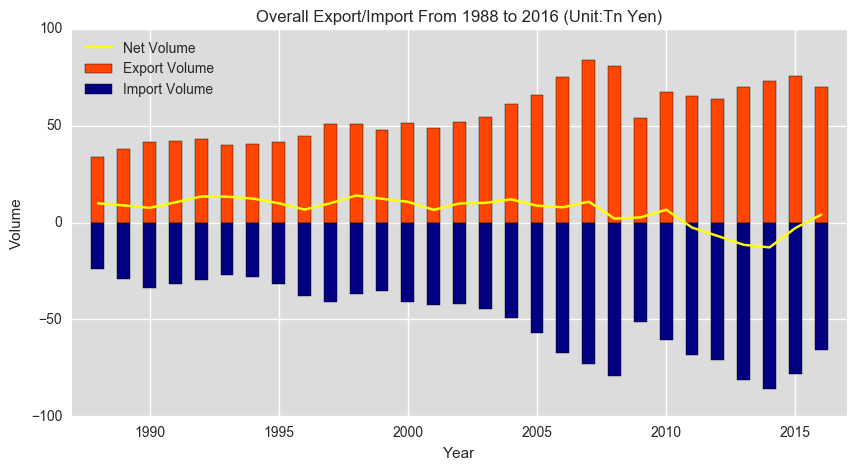

In [14]:
# plot trade balance
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.patch.set_facecolor('Gainsboro')

ax.bar(balance_export.index, balance_export['VY'], width=0.5, color='OrangeRed',align='center',label='Export Volume')
ax.bar(balance_import.index, -balance_import['VY'], width=0.5, color='Navy',align='center',label='Import Volume')
ax.plot(balance_export.index,balance_export['VY']-balance_import['VY'],color='Yellow',label='Net Volume')
plt.xlim((1987,2017))
plt.xlabel('Year')
plt.ylabel('Volume')
plt.legend(loc='upper left')
plt.title('Overall Export/Import From 1988 to 2016 (Unit:Tn Yen)')
plt.show()

### Trade with each Area

In [15]:
# Trade trend by Continent from 1988 to 2016
area_stats_df = data_whole[['Exp|Imp','Year','Country','VY']].merge(country_df,on='Country')
area_stats_df.drop(['Country','Country Name'],axis=1,inplace=True)

# differentiate import and export
area_stats_export = area_stats_df[area_stats_df['Exp|Imp']==1].drop(['Exp|Imp'],axis=1)
area_stats_import = area_stats_df[area_stats_df['Exp|Imp']==2].drop(['Exp|Imp'],axis=1)

# group by area
area_stats_export = area_stats_export.groupby(['Year','Area']).sum()/1000000000
area_stats_import = area_stats_import.groupby(['Year','Area']).sum()/1000000000

# rearrange data
area_stats_export = area_stats_export.unstack()
area_stats_export.columns = area_stats_export.columns.droplevel()

area_stats_import = area_stats_import.unstack()
area_stats_import.columns = area_stats_import.columns.droplevel()

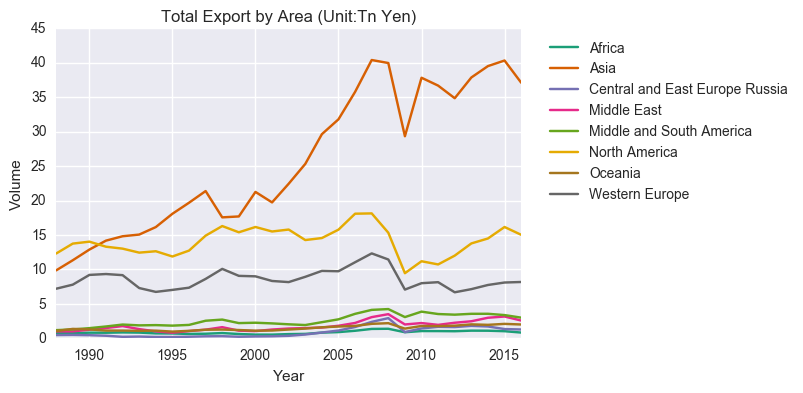

In [16]:
# Total Export by Area
area_stats_export.plot(colormap='Dark2')
plt.legend(bbox_to_anchor=(1.6, 1))
plt.ylabel('Volume')
plt.title('Total Export by Area (Unit:Tn Yen)',fontsize=12)
plt.show() 

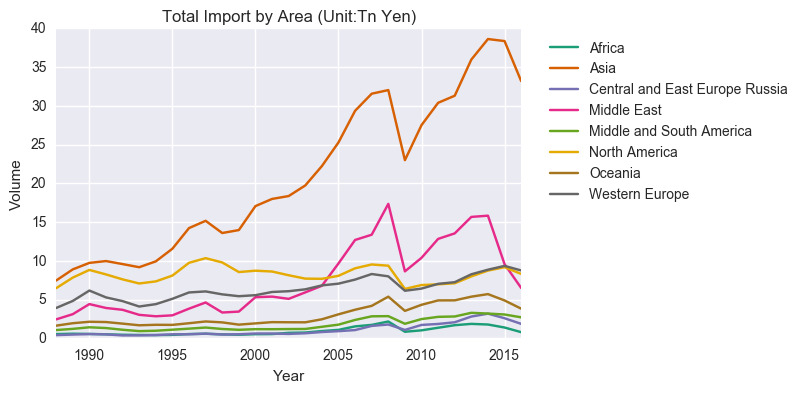

In [17]:
# Total Import by Area
area_stats_import.plot(colormap='Dark2')
plt.legend(bbox_to_anchor=(1.6, 1))
plt.ylabel('Volume')
plt.title('Total Import by Area (Unit:Tn Yen)',fontsize=12)
plt.show()

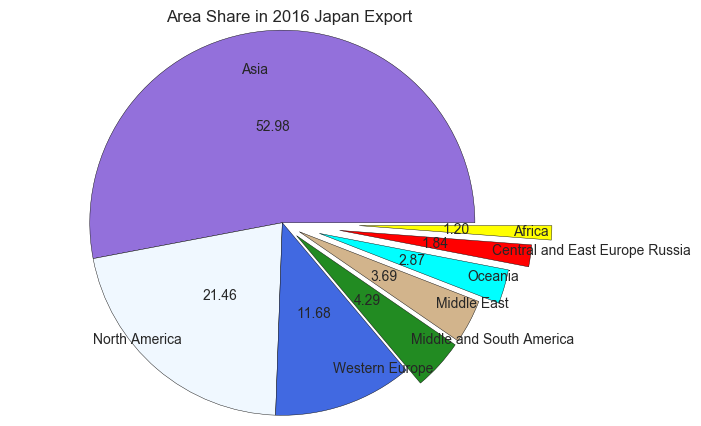

In [18]:
# 2016 Export Pie Chart 

area_stats_export_2016 = area_stats_export.loc[2016]
area_stats_export_2016.sort_values(ascending=False,inplace=True)

explode = (0, 0, 0, 0.1, 0.1, 0.2, 0.3, 0.4)
colors_1 = ['MediumPurple','AliceBlue','RoyalBlue','ForestGreen','Tan','Aqua','Red','Yellow']

plt.figure(figsize=(8,5))
area_stats_export_2016.plot(kind='pie',colors=colors_1,fontsize=10,
                            explode=explode,autopct='%.2f',labeldistance=0.8,pctdistance=0.5)
plt.axis('equal')
plt.ylabel('')
plt.title('Area Share in 2016 Japan Export',position=(0.45,1))
# plt.legend(labels=area_stats_export_2016.index,bbox_to_anchor=(1.3, 1))
plt.show()

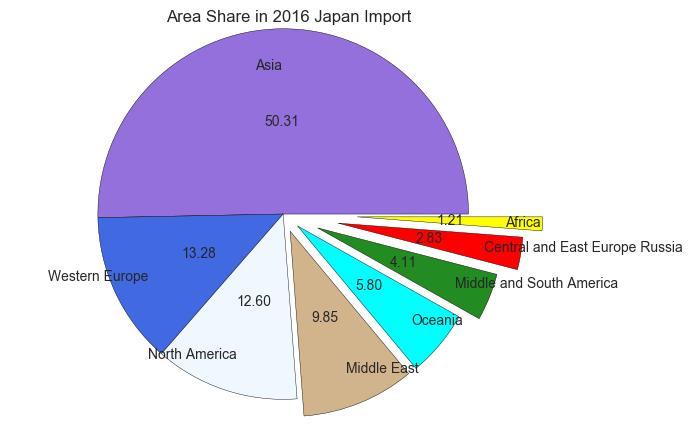

In [19]:
# # 2016 Import Pie Chart 
area_stats_import_2016 = area_stats_import.loc[2016]
area_stats_import_2016.sort_values(ascending=False,inplace=True)

explode = (0, 0, 0, 0.1, 0.1, 0.2, 0.3, 0.4)
colors_2 = ['MediumPurple','RoyalBlue','AliceBlue','Tan','Aqua','ForestGreen','Red','Yellow']

plt.figure(figsize=(8,5))
area_stats_import_2016.plot(kind='pie',colors=colors_2,fontsize=10,
                            explode=explode,autopct='%.2f',labeldistance=0.8,pctdistance=0.5)
plt.axis('equal')
plt.ylabel('')
plt.title('Area Share in 2016 Japan Import',position=(0.45,1))
# plt.legend(labels=area_stats_import_2016.index,bbox_to_anchor=(1.3, 1))
plt.show()

### Major Export Destination

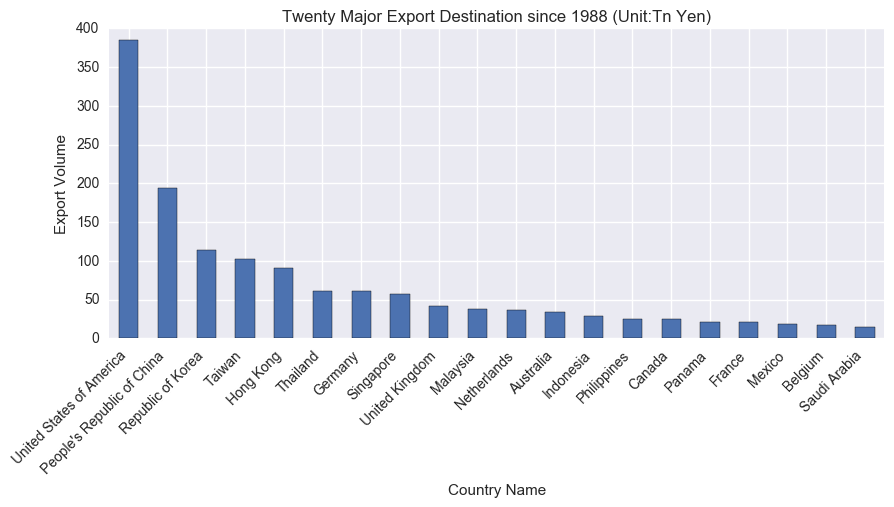

In [20]:
major_df = data_whole[['Exp|Imp','Year','Country','VY']].merge(country_df,how='outer',on='Country')
major_df = major_df[major_df['Exp|Imp']==1].drop(['Exp|Imp'],axis=1)

# choose twenty major trading partner
major_df = major_df.drop(['Area','Country','Year'],axis=1).groupby(
    ['Country Name']).sum().sort_values('VY',ascending=False,axis=0).ix[:20,:]/1000000000
 
major_df.plot(kind='bar',figsize=(10,4),rot=45,legend=False)
plt.ylabel('Export Volume')
plt.title('Twenty Major Export Destination since 1988 (Unit:Tn Yen)')
plt.xticks(ha='right')
plt.show()

### Trade with Asia

In [21]:
# Trade trend withn Asia from 1988 to 2016
asia_stats_df = data_whole[['Exp|Imp','Year','Country','VY']].merge(country_df,on='Country')
asia_stats_df = asia_stats_df[asia_stats_df['Area']=='Asia'].drop(['Country','Area'],axis=1)

# choose ten major trading partner
asia_top_ten = pd.DataFrame(asia_stats_df.groupby(['Country Name']).sum().sort_values('VY',ascending=False,axis=0).ix[:10,:].index)
asia_stats_df = asia_stats_df.merge(asia_top_ten,how='right',on='Country Name')


# differentiate import and export
asia_stats_export = asia_stats_df[asia_stats_df['Exp|Imp']==1].drop(['Exp|Imp'],axis=1)
asia_stats_import = asia_stats_df[asia_stats_df['Exp|Imp']==2].drop(['Exp|Imp'],axis=1)

# group by country
asia_stats_export = asia_stats_export.groupby(['Year','Country Name']).sum()/1000000000
asia_stats_import = asia_stats_import.groupby(['Year','Country Name']).sum()/1000000000

# rearrange data
asia_stats_export= asia_stats_export.unstack()
asia_stats_export.columns = asia_stats_export.columns.droplevel()

asia_stats_import = asia_stats_import.unstack()
asia_stats_import.columns = asia_stats_import.columns.droplevel()

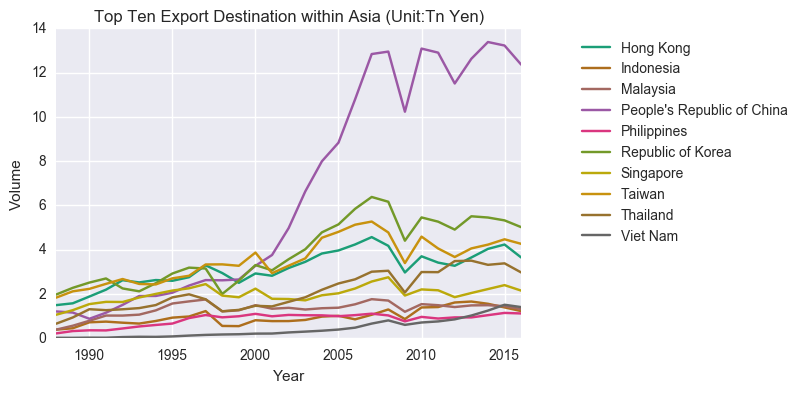

In [22]:
# Top Ten Export Destination within Asia

asia_stats_export.plot(colormap='Dark2')
plt.legend(bbox_to_anchor=(1.6, 1))
plt.ylabel('Volume')
plt.title('Top Ten Export Destination within Asia (Unit:Tn Yen)',fontsize=12)
plt.show()

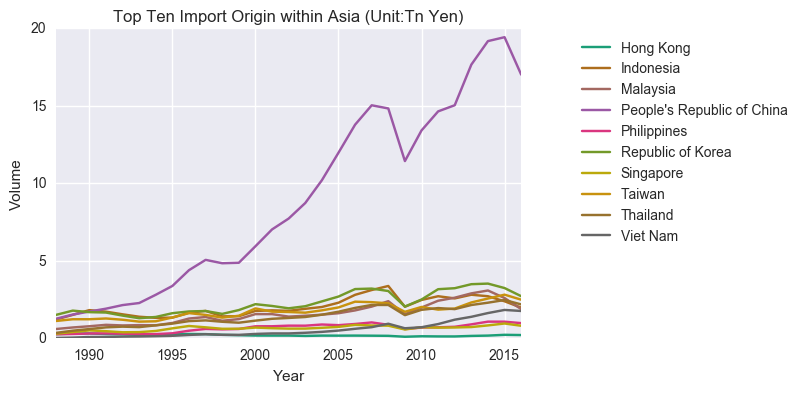

In [23]:
# Top Ten Import Origin within Asia

asia_stats_import.plot(colormap='Dark2')
plt.legend(bbox_to_anchor=(1.6, 1))
plt.ylabel('Volume')
plt.title('Top Ten Import Origin within Asia (Unit:Tn Yen)',fontsize=12)
plt.show()

### Export/Import with Specific Country and the Popular Commodity 

In [24]:
def country_ex_im(country,start=2007,end=2016,items=5):
    """
    Output the detail of overall trade balance, popular export commodities and popular import commodities 
    between any country and Japan.
    
    Year range should be within 1988 and 2016. Default is 2007 to 2016.
    
    Specify the number of interested popular commodities by items, default is 5.
    """
    if start<1988 or end>2016: 
        print('Since trade statistics ranges from 1988 to 2016, analysis within this range will be performed.')
    
    if start<1988: start=1988
    if end>2016: end=2016
    
    country_code = country_df[country_df['Country Name']==country]['Country'].to_string(index=False)
    object_df = data_whole[data_whole['Country']==int(country_code)][['Exp|Imp','Year','VY','hs2']]
    object_df = object_df.groupby(['Exp|Imp','Year','hs2']).sum()/1000000
    object_df.reset_index(inplace=True)

    # drop irrelevant data
    for year1 in range(1988,start):
        object_df.drop(object_df[object_df['Year']==year1].index,inplace=True)

    for year1 in range(end+1,2017):
        object_df.drop(object_df[object_df['Year']==year1].index,inplace=True)

    object_export = object_df[object_df['Exp|Imp']==1].drop(['Exp|Imp'],axis=1)
    object_import = object_df[object_df['Exp|Imp']==2].drop(['Exp|Imp'],axis=1)

    # extract year data
    object_export_year = object_export.drop(['hs2'],axis=1).groupby(['Year']).sum()
    object_import_year = object_import.drop(['hs2'],axis=1).groupby(['Year']).sum()

    # extract popular items from provided year range
    for year2 in range(start,end+1):
        object_export.drop(
            object_export[object_export['Year']==year2].sort_values(by='VY',ascending=True).iloc[:-items].index,inplace=True)
        object_import.drop(
            object_import[object_import['Year']==year2].sort_values(by='VY',ascending=True).iloc[:-items].index,inplace=True)

    # plot trade balance by year
    fig1 = plt.figure(figsize=(10,5))
    ax = plt.subplot(111)
    ax.patch.set_facecolor('Gainsboro')

    ax.bar(object_export_year.index, object_export_year['VY'], 
           width=0.5, color='OrangeRed',align='center',label='Export Volume')
    ax.bar(object_import_year.index, -object_import_year['VY'], 
           width=0.5, color='Navy',align='center',label='Import Volume')
    ax.plot(object_export_year.index,object_export_year['VY']-object_import_year['VY'],color='Yellow',label='Net Volume')
    plt.xlim((start-1,end+1))
    plt.xlabel('Year')
    plt.ylabel('Volume Unit:Bn Yen')
    plt.legend(bbox_to_anchor=(1.2, 1))
    plt.title("Export/Import with "+country+" From "+str(start)+" to "+str(end),fontsize=13)
    plt.show()

    # plot popular export commodity

    com1_list = object_export.pivot(index='Year', columns='hs2', values='VY').mean().sort_values(ascending=False).index.tolist()
    object_export_sort = object_export.pivot(index='Year', columns='hs2', values='VY')[com1_list]
    ax1 = object_export_sort.plot(kind='barh',colormap='rainbow',figsize=(10,6),stacked='True',rot=0)
    ax1.patch.set_facecolor('Gainsboro')
    ax1.legend(bbox_to_anchor=(1.1, 1.02))
    ax1.set_ylabel('Volume Unit:Bn Yen')
    plt.title(str(items)+" Most Popular Export to "+country+" Range from "+str(start)+" to "+str(end),fontsize=12)
    plt.show()

    for com in com1_list:
        print (com,code_h2_dic[com])

    # plot popular import commodity

    com2_list = object_import.pivot(index='Year', columns='hs2', values='VY').mean().sort_values(ascending=False).index.tolist()
    object_import_sort = object_import.pivot(index='Year', columns='hs2', values='VY')[com2_list]
    ax2 = object_import_sort.plot(kind='barh',colormap='rainbow',figsize=(10,6),stacked='True',rot=0)
    ax2.patch.set_facecolor('Gainsboro')
    ax2.legend(bbox_to_anchor=(1.1, 1.02))
    ax2.set_ylabel('Volume Unit:Bn Yen')
    plt.title(str(items)+" Most Popular Import from "+country+" Range from "+str(start)+" to "+str(end),fontsize=12)
    plt.show()

    for com in com2_list:
        print (com,code_h2_dic[com])

    return None

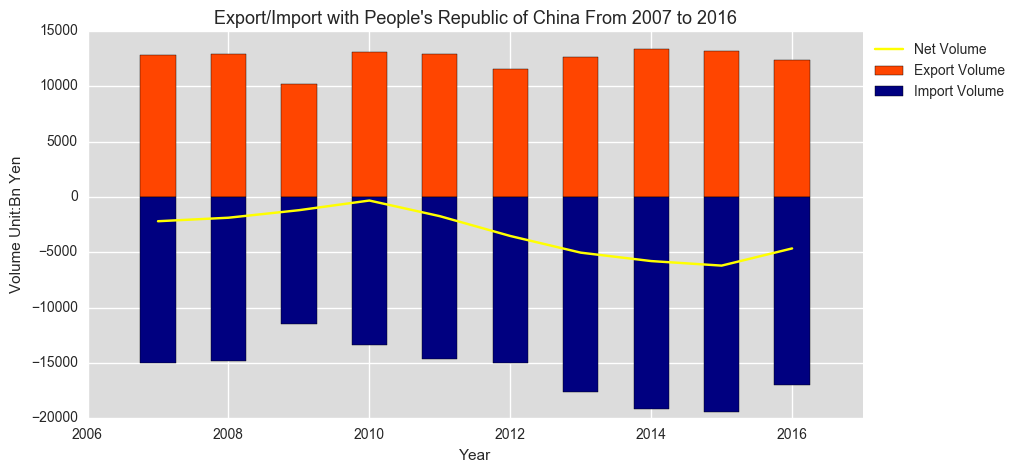

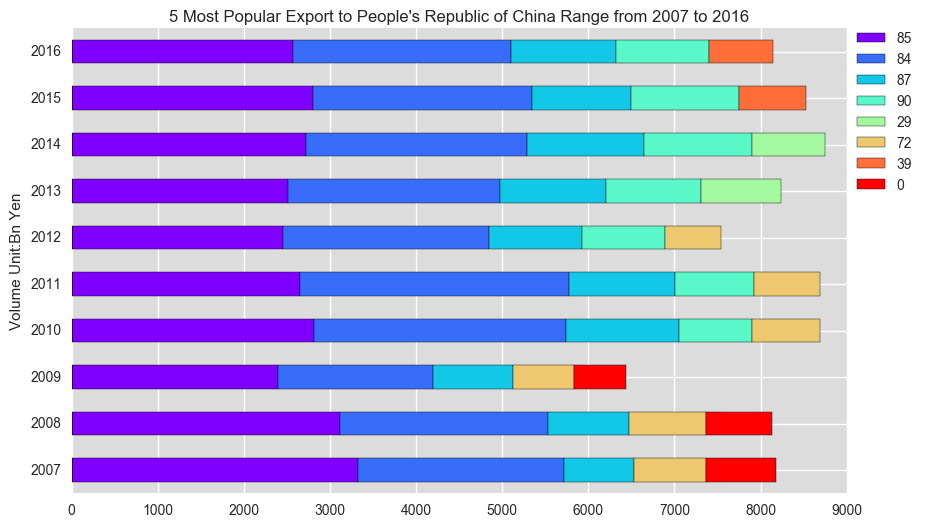

85 Electrical machinery and equipment and parts thereof; sound recorders and reproducers  television image and sound recorders and reproducers  and parts and accessories of such articles.
84 Nuclear reactors  boilers  machinery and mechanical appliances; parts thereof.
87 Vehicles other than railway or tramway rolling-stock  and parts and accessories thereof.
90 Optical  photographic  cinematographic  measuring  checking  precision  medical or surgical instruments and apparatus; parts and accessories thereof.
29 Organic chemicals.
72 Iron and steel.
39 Plastics and articles thereof.
0 Unknown


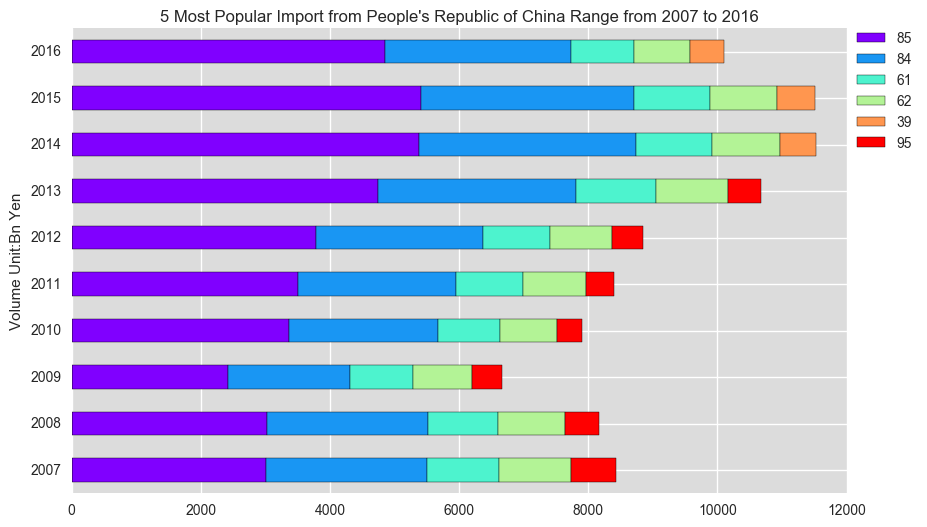

85 Electrical machinery and equipment and parts thereof; sound recorders and reproducers  television image and sound recorders and reproducers  and parts and accessories of such articles.
84 Nuclear reactors  boilers  machinery and mechanical appliances; parts thereof.
61 Articles of apparel and clothing accessories  knitted or crocheted.
62 Articles of apparel and clothing accessories  not knitted or crocheted.
39 Plastics and articles thereof.
95 Toys  games and sports requisites; parts and accessories thereof.


In [25]:
# Let's choose People's Republic of China to continue the trade analysis with Asia
country_ex_im("People's Republic of China")

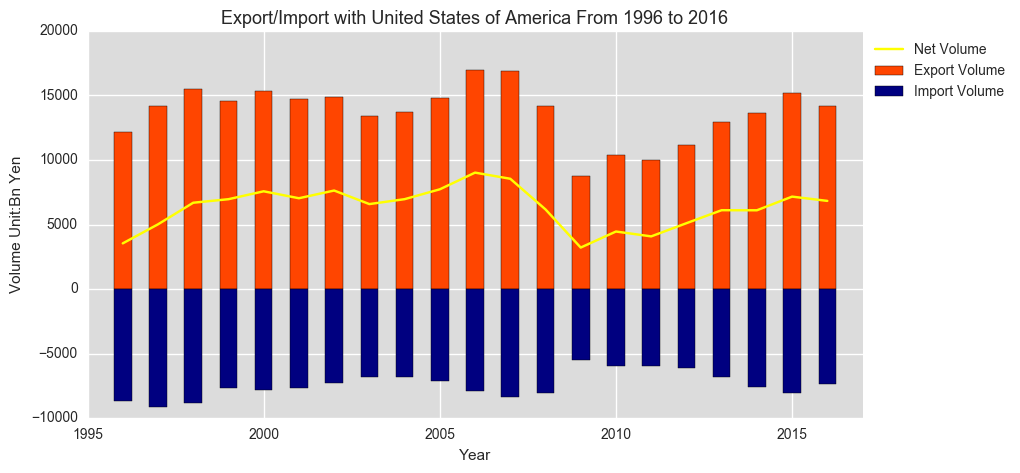

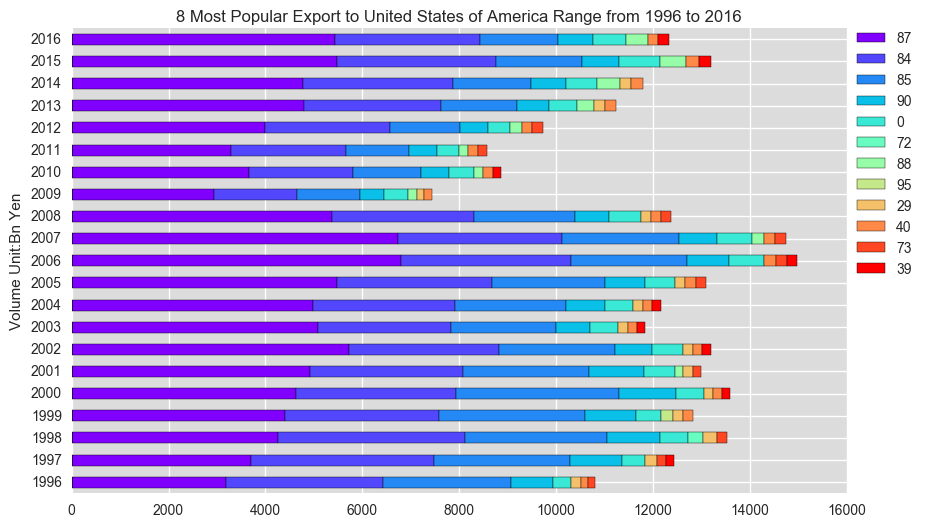

87 Vehicles other than railway or tramway rolling-stock  and parts and accessories thereof.
84 Nuclear reactors  boilers  machinery and mechanical appliances; parts thereof.
85 Electrical machinery and equipment and parts thereof; sound recorders and reproducers  television image and sound recorders and reproducers  and parts and accessories of such articles.
90 Optical  photographic  cinematographic  measuring  checking  precision  medical or surgical instruments and apparatus; parts and accessories thereof.
0 Unknown
72 Iron and steel.
88 Aircraft  spacecraft  and parts thereof.
95 Toys  games and sports requisites; parts and accessories thereof.
29 Organic chemicals.
40 Rubber and articles thereof.
73 Articles of iron or steel.
39 Plastics and articles thereof.


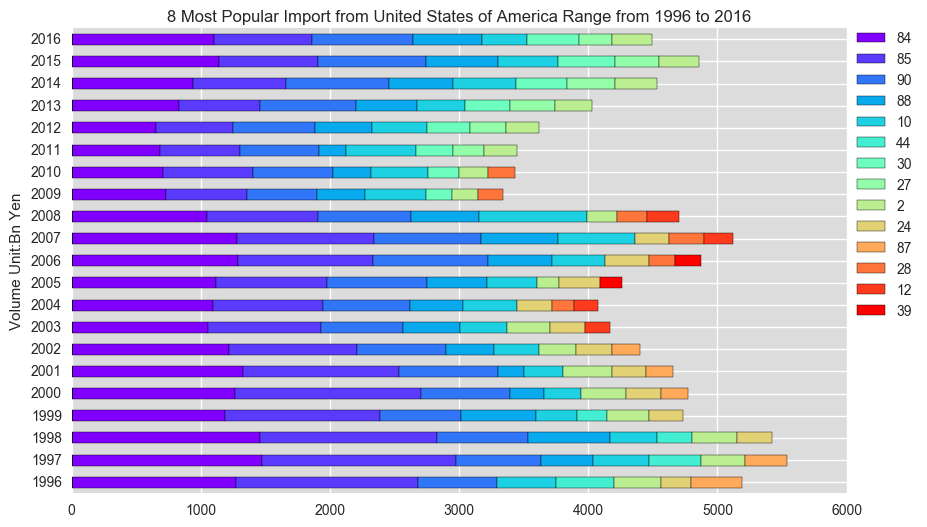

84 Nuclear reactors  boilers  machinery and mechanical appliances; parts thereof.
85 Electrical machinery and equipment and parts thereof; sound recorders and reproducers  television image and sound recorders and reproducers  and parts and accessories of such articles.
90 Optical  photographic  cinematographic  measuring  checking  precision  medical or surgical instruments and apparatus; parts and accessories thereof.
88 Aircraft  spacecraft  and parts thereof.
10 Cereals.
44 Wood and articles of wood; wood charcoal.
30 Pharmaceutical products.
27 Mineral fuels  mineral oils and products of their distillation; bituminous substances; mineral waxes.
2 Meat and edible meat offal.
24 Tobacco and manufactured tobacco substitutes.
87 Vehicles other than railway or tramway rolling-stock  and parts and accessories thereof.
28 Inorganic chemicals; organic or inorganic compounds of precious metals  of rare-earth metals  of radioactive elements or of isotopes.
12 Oil seeds and oleaginous fruits;

In [26]:
country_ex_im("United States of America",1996,2016,items=8)

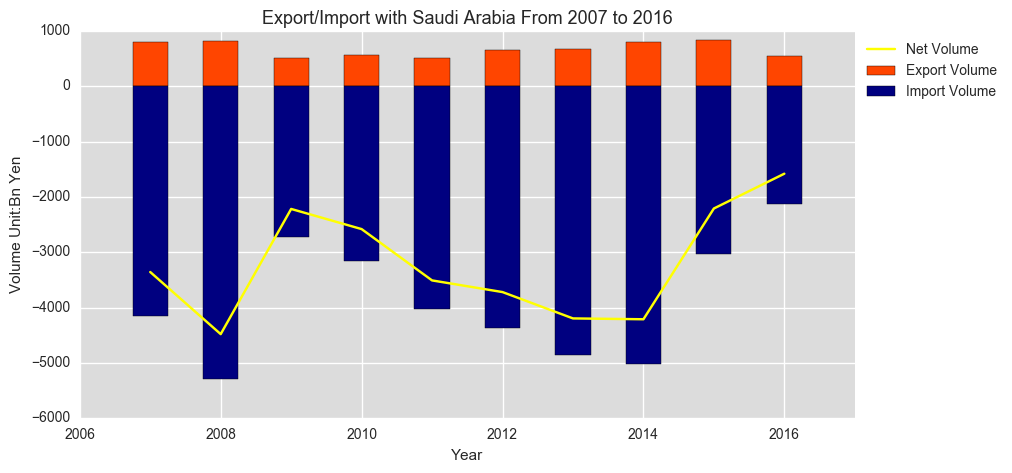

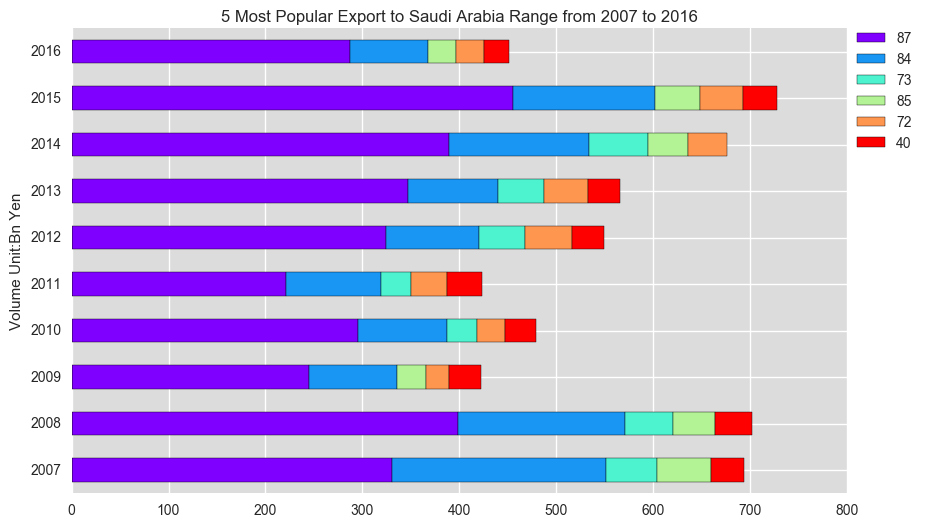

87 Vehicles other than railway or tramway rolling-stock  and parts and accessories thereof.
84 Nuclear reactors  boilers  machinery and mechanical appliances; parts thereof.
73 Articles of iron or steel.
85 Electrical machinery and equipment and parts thereof; sound recorders and reproducers  television image and sound recorders and reproducers  and parts and accessories of such articles.
72 Iron and steel.
40 Rubber and articles thereof.


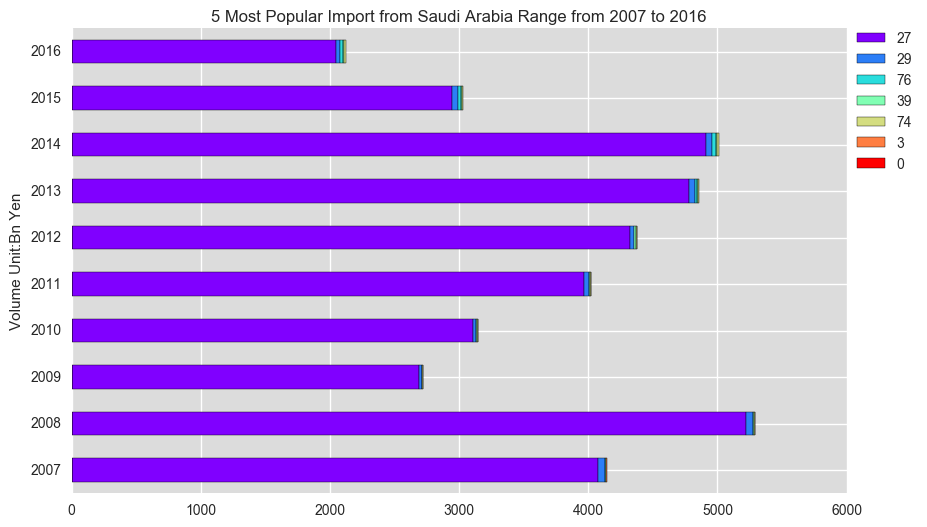

27 Mineral fuels  mineral oils and products of their distillation; bituminous substances; mineral waxes.
29 Organic chemicals.
76 Aluminium and articles thereof.
39 Plastics and articles thereof.
74 Copper and articles thereof.
3 Fish and crustaceans  molluscs and other aquatic invertebrates.
0 Unknown


In [27]:
country_ex_im("Saudi Arabia")

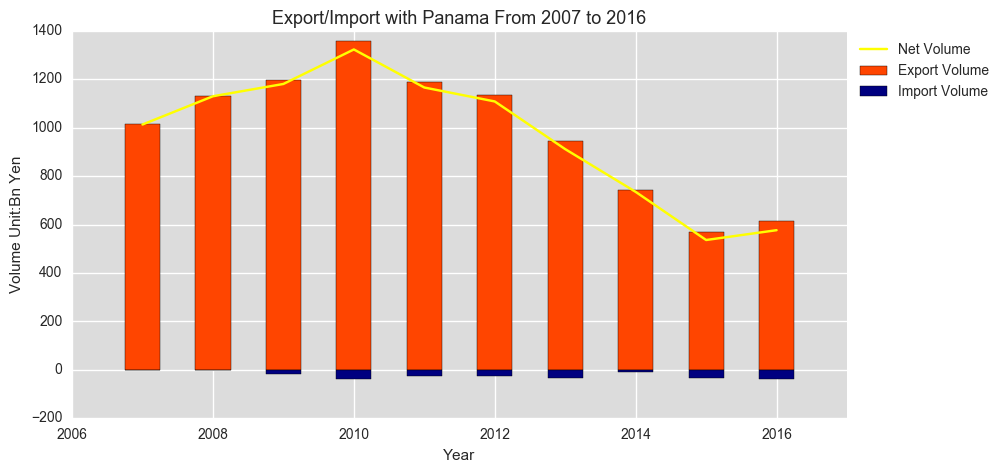

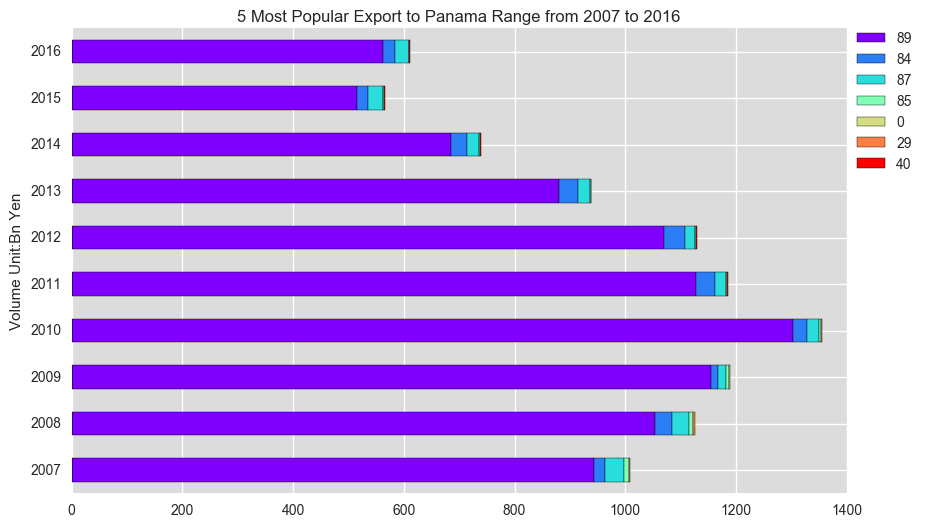

89 Ships  boats and floating structures.
84 Nuclear reactors  boilers  machinery and mechanical appliances; parts thereof.
87 Vehicles other than railway or tramway rolling-stock  and parts and accessories thereof.
85 Electrical machinery and equipment and parts thereof; sound recorders and reproducers  television image and sound recorders and reproducers  and parts and accessories of such articles.
0 Unknown
29 Organic chemicals.
40 Rubber and articles thereof.


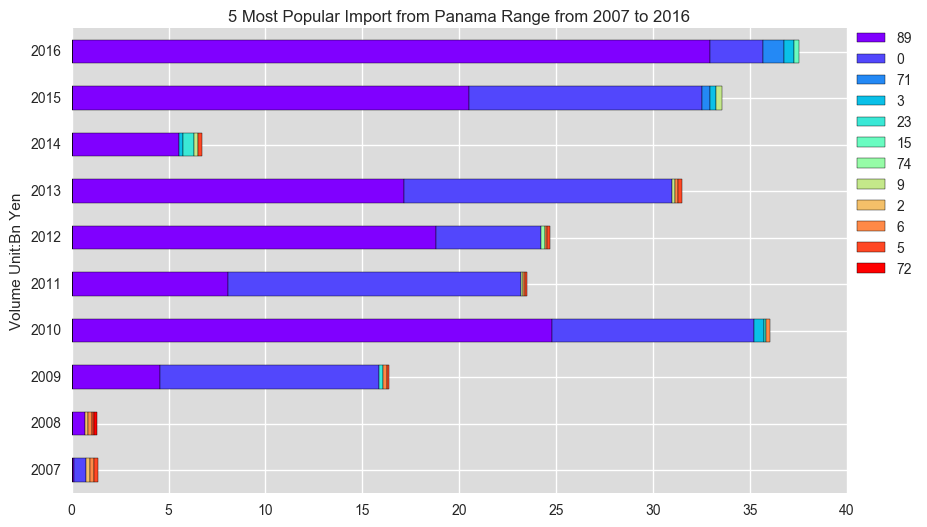

89 Ships  boats and floating structures.
0 Unknown
71 Natural or cultured pearls  precious or semi-precious stones  precious metals  metals clad with precious metal and articles thereof; imitation jewellery; coin.
3 Fish and crustaceans  molluscs and other aquatic invertebrates.
23 Residues and waste from the food industries; prepared animal fodder.
15 Animal or vegetable fats and oils and their cleavage products; prepared edible fats; animal or vegetable waxes.
74 Copper and articles thereof.
9 Coffee  tea  mate and spices.
2 Meat and edible meat offal.
6 Live trees and other plants; bulbs  roots and the like; cut flowers and ornamental foliage.
5 Products of animal origin  not elsewhere specified or included.
72 Iron and steel.


In [28]:
country_ex_im("Panama")

In [29]:
# country_ex_im("Croatia")

### Export Trade Model

#### Export Model of Ten Major Trading Partner

In [30]:
model_df = data_whole[['Exp|Imp','Year','Country','VY']].merge(country_df,how='outer',on='Country')
model_df = model_df[model_df['Exp|Imp']==1].drop(['Exp|Imp'],axis=1)

# choose ten major trading partner
export_model1_df = model_df.drop(['Area','Country'],axis=1)
top_ten = pd.DataFrame(export_model1_df.groupby(['Country Name']).sum().sort_values('VY',ascending=False,axis=0).ix[:10,:].index)
export_model1_df = export_model1_df.merge(top_ten,how='right',on='Country Name').groupby(['Year','Country Name']).sum()/1000000000
export_model1_df = export_model1_df.unstack()
export_model1_df.columns = export_model1_df.columns.droplevel()

# Multiple Regression by OLS
Y = balance_export
X = export_model1_df
X = sm.add_constant(X)
sm.OLS(Y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     VY   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1253.
Date:                Fri, 10 Mar 2017   Prob (F-statistic):           1.83e-23
Time:                        13:35:58   Log-Likelihood:                -22.705
No. Observations:                  29   AIC:                             67.41
Df Residuals:                      18   BIC:                             82.45
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
const                         -4.4528      1.269     -3.508      0.003        -7.119    -1.786
Germany                        4.6077      0.809      5.693      0.000         2.907     6.308
Hong Kong                      0.8598      0.702      1.225      0.237        -0.615     2.335
Malaysia                       0.9796      1.432      0.684      0.503        -2.030     3.989
People's Republic of China     2.0235      0.157     12.879      0.000         1.693     2.354
Republic of Korea              0.9922      0.434      2.285      0.035         0.080     1.904
Singapore                      2.6354      1.054      2.500      0.022         0.420     4.851
Taiwan                        -0.1356      0.659     -0.206      0.839        -1.520     1.248
Thailand                       1.4226      0.719      1.979      0.063        -0.087     2.933
United Kingdom                 3.9080      1.811      2.158      0.045         0.103     7.713
United States of America       1.2136      0.119     10.193      0.000         0.963     1.464
==============================================================================
Omnibus:                        5.646   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                4.220
Skew:                           0.577   Prob(JB):                        0.121
Kurtosis:                       4.470   Cond. No.                         282.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Backward Elimination of Previous Model

In [31]:
Y = balance_export
X = export_model1_df[["United States of America","People's Republic of China","Republic of Korea","Thailand","Germany","Singapore","United Kingdom"]]
X = sm.add_constant(X)
sm.OLS(Y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     VY   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1775.
Date:                Fri, 10 Mar 2017   Prob (F-statistic):           1.21e-27
Time:                        13:35:58   Log-Likelihood:                -25.058
No. Observations:                  29   AIC:                             66.12
Df Residuals:                      21   BIC:                             77.06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
const                         -4.9300      1.198     -4.115      0.000        -7.421    -2.439
United States of America       1.2551      0.111     11.278      0.000         1.024     1.487
People's Republic of China     1.9888      0.119     16.736      0.000         1.742     2.236
Republic of Korea              1.1595      0.383      3.025      0.006         0.362     1.957
Thailand                       1.8504      0.656      2.822      0.010         0.487     3.214
Germany                        3.9613      0.650      6.092      0.000         2.609     5.314
Singapore                      3.6833      0.597      6.172      0.000         2.442     4.924
United Kingdom                 4.8515      1.524      3.183      0.004         1.682     8.021
==============================================================================
Omnibus:                        1.176   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.556   Jarque-Bera (JB):                0.337
Skew:                          -0.186   Prob(JB):                        0.845
Kurtosis:                       3.376   Cond. No.                         219.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Export Model of Three Major Trading Partner

In [32]:
export_model2_df = model_df.drop(['Area','Country'],axis=1)
top_three = pd.DataFrame(export_model2_df.groupby(['Country Name']).sum().sort_values('VY',ascending=False,axis=0).ix[:3,:].index)
export_model2_df = export_model2_df.merge(top_three,how='right',on='Country Name').groupby(['Year','Country Name']).sum()/1000000000
export_model2_df = export_model2_df.unstack()
export_model2_df.columns = export_model2_df.columns.droplevel()

Y = balance_export
X = export_model2_df
X = sm.add_constant(X)
sm.OLS(Y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     VY   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     435.3
Date:                Fri, 10 Mar 2017   Prob (F-statistic):           1.08e-21
Time:                        13:36:00   Log-Likelihood:                -59.998
No. Observations:                  29   AIC:                             128.0
Df Residuals:                      25   BIC:                             133.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
const                          5.6200      2.790      2.014      0.055        -0.126    11.366
People's Republic of China     1.6719      0.294      5.681      0.000         1.066     2.278
Republic of Korea              3.4908      1.033      3.379      0.002         1.363     5.618
United States of America       1.9355      0.221      8.739      0.000         1.479     2.392
==============================================================================
Omnibus:                        2.537   Durbin-Watson:                   0.972
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                1.858
Skew:                           0.619   Prob(JB):                        0.395
Kurtosis:                       2.944   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Busiest Ports

In [33]:
import matplotlib.font_manager as fm
font = fm.FontProperties(fname='ipam.ttc')

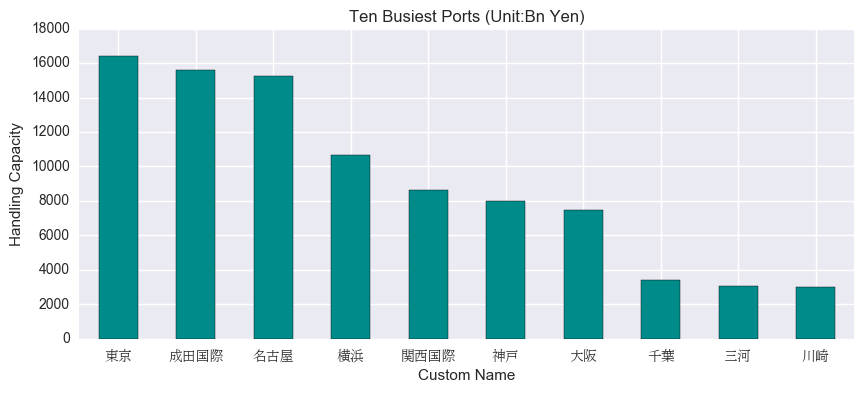

In [34]:
port_df = data_2016.drop(['Exp|Imp','Year','Month','Unit1','Unit2','hs2','hs4','hs6','hs9','Q1','Q2','Country'],axis=1)
port_df = port_df.merge(custom_df,on='Custom').drop(['Custom'],axis=1)
port_df = port_df.groupby(['Custom Name']).sum().sort_values(by='Value',ascending=False)/1000000
nippon = port_df.ix[:10,:].plot(kind='bar',color='DarkCyan',figsize=(10,4),rot=0,legend=False)
nippon.set_xticklabels(port_df.index[:10], fontproperties=font,ha='center')
nippon.set_ylabel('Handling Capacity')
nippon.set_title('Ten Busiest Ports (Unit:Bn Yen)')
plt.show()

### Insight

+ ##### Normally, Japan is trade surplus country except the period between 2011 and 2014.
+ ##### The main region of Japan export is Asia, North America and Western Europe.
+ ##### The main region of Japan import is Asia, Western Europe, North America and Middle East.
+ ##### Asia constitues more than half of Japan export as well as Japan import.
+ ##### Japan's most important trade partner within Asia is PRC, and PRC is also the second largest partner in the world. The impetus that PRC provided was significant since 2002 when PRC joined WTO.
+ ##### The bilateral trade structure between Japan and PRC is noticeable different. Japan's export to PRC is mainly high added value commodities, while Japan's import from PRC is mainly low added value commodities, especially from labor-intensive industry. However, the export to PRC has been stagnated, maybe due to the slowing economic activity of PRC.
+ ##### Japan keeps trade surplus status with US in the last 20 years. The most populor Japan export is Vehicle. And it can be seen that the relation of aviation industry between 2 countries is unexpectedly intimate. 
+ ##### Trade deficit of Japan between 2011 and 2014 can be explained by oil price, specifically, the import from Saudi Arabia.
+ ##### Given Japan is one of the major ship builder in the world and large amount of ocean ferighter is registered under Panama, it makes sense that Panama ranks top 20 export destination of Japan.
+ ##### (Choose the country you are interested in, see what data tells)
+ ##### Using trade statistics with US, PRC and Korea only, Japan total export can be predicted.
+ ##### Top ten ports all locate at three major metropolitan area. Tokyo, Narita Airport, Yokohama, Chiba and Kawasaki are within Greater Tokyo Area. Kansai Airpot, Kobe and Oasaka are within Keihanshin area. Nagoya and Mikawa are within Chukyoken area. Unsurprisingly, Greater Tokyo, Keihanshin and Chukyoken are veritable economic center of Japan.